In [2]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt

import tensorflow as tf
import cv2

import mediapipe as mp

import warnings
warnings.filterwarnings('ignore')

## Key Point Detection in MediaPipe

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    #Convert image from opencv format (BGR) to RGB
    image.flags.writeable = False                     #set writeable to false
    results = model.process(image)                    #make prediction 
    image.flags.writeable = True                      #set back writeable to true 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)    #set back the color format to BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    # Draw Face Landmarks
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color= (80, 110, 10), thickness = 1, circle_radius = 1),
                              mp_drawing.DrawingSpec(color= (80, 256, 121), thickness = 1, circle_radius = 1)
                             )

    # Draw Face Landmarks
    mp_drawing.draw_landmarks(image, results.pose_landmarks , mp_holistic.POSE_CONNECTIONS ,
                              mp_drawing.DrawingSpec(color= (80, 20, 10), thickness = 1, circle_radius = 1),
                              mp_drawing.DrawingSpec(color= (80, 44, 121), thickness = 1, circle_radius = 1)
                             )

    # Draw Face Landmarks
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS ,
                              mp_drawing.DrawingSpec(color= (121, 22, 76), thickness = 1, circle_radius = 1),
                              mp_drawing.DrawingSpec(color= (121, 44, 250), thickness = 1, circle_radius = 1)
                             )

    # Draw Face Landmarks
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS ,
                              mp_drawing.DrawingSpec(color= (245, 117, 66), thickness = 1, circle_radius = 1),
                              mp_drawing.DrawingSpec(color= (245, 66, 230), thickness = 1, circle_radius = 1)
                             )

In [6]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: # choose the mediapipe model
    while cap.isOpened():

        # read the feed
        ret, frame = cap.read()

        #predict on the model
        image, results = mediapipe_detection(frame, holistic)

        draw_landmarks(image, results)
        print(results)

        
        cv2.imshow("Frame", image)
    
        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break
        
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1714222562.276125    6028 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1714222562.282262    6781 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: RENOIR (renoir, LLVM 15.0.7, DRM 3.42, 5.15.0-105-generic)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
results.face_landmarks

landmark {
  x: 0.573108733
  y: 0.594747186
  z: -0.0348495208
}
landmark {
  x: 0.570114732
  y: 0.543664157
  z: -0.070199959
}
landmark {
  x: 0.572519243
  y: 0.557996452
  z: -0.0353452861
}
landmark {
  x: 0.559903681
  y: 0.487894684
  z: -0.053749226
}
landmark {
  x: 0.569760323
  y: 0.5270136
  z: -0.0752314851
}
landmark {
  x: 0.570237
  y: 0.504335523
  z: -0.0707742646
}
landmark {
  x: 0.572550535
  y: 0.449812621
  z: -0.0382087752
}
landmark {
  x: 0.484227389
  y: 0.441299349
  z: 0.0208389405
}
landmark {
  x: 0.573136687
  y: 0.412568927
  z: -0.031694632
}
landmark {
  x: 0.572984278
  y: 0.391682386
  z: -0.0356837735
}
landmark {
  x: 0.573273
  y: 0.310303509
  z: -0.0250151809
}
landmark {
  x: 0.573344529
  y: 0.602988422
  z: -0.0327883847
}
landmark {
  x: 0.573776603
  y: 0.6094262
  z: -0.0280879289
}
landmark {
  x: 0.574353933
  y: 0.612068474
  z: -0.0219225194
}
landmark {
  x: 0.574602962
  y: 0.621148169
  z: -0.0185252447
}
landmark {
  x: 0.574569

In [8]:
draw_landmarks(frame, results)

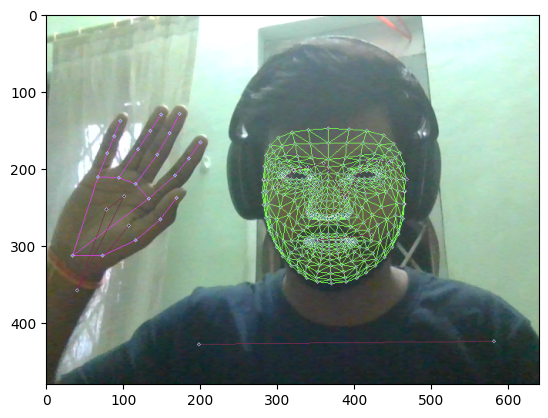

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Extract Keypoints

In [10]:
print ("No. of Face Landmarks ", len(results.face_landmarks.landmark))
print ("No. of Pose Landmarks ", len(results.pose_landmarks.landmark))
print ("No. of Right Hand Landmarks ", len(results.right_hand_landmarks.landmark)) # It'll be same as left Hand landmarks

No. of Face Landmarks  468
No. of Pose Landmarks  33
No. of Right Hand Landmarks  21


In [11]:
pose = []

for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose

[array([ 0.606727  ,  0.49622026, -1.5835011 ,  0.99997336]),
 array([ 0.65063274,  0.39410222, -1.47489762,  0.99996358]),
 array([ 0.67435694,  0.39611641, -1.47527981,  0.99994963]),
 array([ 0.69610518,  0.40094852, -1.47530031,  0.99994844]),
 array([ 0.56288433,  0.403786  , -1.44675052,  0.99996924]),
 array([ 0.53071886,  0.41258112, -1.44553721,  0.99996763]),
 array([ 0.5030393 ,  0.42221534, -1.44602704,  0.99997675]),
 array([ 0.73175323,  0.44698492, -0.77989203,  0.99995387]),
 array([ 0.46474004,  0.46910995, -0.60915291,  0.99997979]),
 array([ 0.66003776,  0.5965358 , -1.33487582,  0.99996406]),
 array([ 0.54743123,  0.61157739, -1.29125857,  0.99997014]),
 array([ 0.90834749,  0.88378066, -0.35372016,  0.99645233]),
 array([ 0.31057209,  0.89230657, -0.2766012 ,  0.99945003]),
 array([ 1.11685538,  1.35690618, -0.26777938,  0.14450639]),
 array([-0.1111956 ,  1.23974347, -1.26036191,  0.97975707]),
 array([ 1.13821161,  1.72530878, -0.5241555 ,  0.1732869 ]),
 array([

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3) # handling the case if there is no left hand in the frame

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    return np.concatenate([pose, face, lh, rh])

In [16]:
test_Res = extract_keypoints(results)

In [17]:
test_Res

array([ 0.606727  ,  0.49622026, -1.5835011 , ...,  0.15153895,
        0.28897855, -0.04390852])

## Creating Folders for Training Data Storage

In [18]:
# path for exported data

DATA_PATH = os.path.join('./Sign_Data')

#Actions list
actions = np.array(['hello', 'thanks', 'iloveyou'])

#Sequence of frame 
no_sequences = 30

#length of video
sequence_length = 30

#Folder start
# start_folder = 30

In [18]:
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    print("Checking action directory:", action_path)
    try:
        dirmax = np.max(np.array(os.listdir(action_path)).astype(int))
        print("Max directory found in", action_path, ":", dirmax)
    except FileNotFoundError:
        print("Action directory not found. Creating:", action_path)
        os.makedirs(action_path)
        dirmax = 0
        pass

    for sequence in range(no_sequences):
        new_sequence_dir = os.path.join(action_path, str(dirmax+sequence))
        print("Creating sequence directory:", new_sequence_dir)
        try:
            os.makedirs(new_sequence_dir)
        except FileExistsError:
            print("Sequence directory already exists:", new_sequence_dir)


Checking action directory: ./Sign_Data/hello
Action directory not found. Creating: ./Sign_Data/hello
Creating sequence directory: ./Sign_Data/hello/0
Creating sequence directory: ./Sign_Data/hello/1
Creating sequence directory: ./Sign_Data/hello/2
Creating sequence directory: ./Sign_Data/hello/3
Creating sequence directory: ./Sign_Data/hello/4
Creating sequence directory: ./Sign_Data/hello/5
Creating sequence directory: ./Sign_Data/hello/6
Creating sequence directory: ./Sign_Data/hello/7
Creating sequence directory: ./Sign_Data/hello/8
Creating sequence directory: ./Sign_Data/hello/9
Creating sequence directory: ./Sign_Data/hello/10
Creating sequence directory: ./Sign_Data/hello/11
Creating sequence directory: ./Sign_Data/hello/12
Creating sequence directory: ./Sign_Data/hello/13
Creating sequence directory: ./Sign_Data/hello/14
Creating sequence directory: ./Sign_Data/hello/15
Creating sequence directory: ./Sign_Data/hello/16
Creating sequence directory: ./Sign_Data/hello/17
Creating 

## Training & Testing Data Collection

In [19]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                print(npy_path)
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1714191345.430502   17182 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1714191345.432493   18238 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: RENOIR (renoir, LLVM 15.0.7, DRM 3.42, 5.15.0-105-generic)


./Sign_Data/hello/0/0
./Sign_Data/hello/0/1
./Sign_Data/hello/0/2
./Sign_Data/hello/0/3
./Sign_Data/hello/0/4
./Sign_Data/hello/0/5
./Sign_Data/hello/0/6
./Sign_Data/hello/0/7
./Sign_Data/hello/0/8
./Sign_Data/hello/0/9
./Sign_Data/hello/0/10
./Sign_Data/hello/0/11
./Sign_Data/hello/0/12
./Sign_Data/hello/0/13
./Sign_Data/hello/0/14
./Sign_Data/hello/0/15
./Sign_Data/hello/0/16
./Sign_Data/hello/0/17
./Sign_Data/hello/0/18
./Sign_Data/hello/0/19
./Sign_Data/hello/0/20
./Sign_Data/hello/0/21
./Sign_Data/hello/0/22
./Sign_Data/hello/0/23
./Sign_Data/hello/0/24
./Sign_Data/hello/0/25
./Sign_Data/hello/0/26
./Sign_Data/hello/0/27
./Sign_Data/hello/0/28
./Sign_Data/hello/0/29
./Sign_Data/hello/1/0
./Sign_Data/hello/1/1
./Sign_Data/hello/1/2
./Sign_Data/hello/1/3
./Sign_Data/hello/1/4
./Sign_Data/hello/1/5
./Sign_Data/hello/1/6
./Sign_Data/hello/1/7
./Sign_Data/hello/1/8
./Sign_Data/hello/1/9
./Sign_Data/hello/1/10
./Sign_Data/hello/1/11
./Sign_Data/hello/1/12
./Sign_Data/hello/1/13
./Sign_D

In [20]:
cap.release()
cv2.destroyAllWindows()

<h1>Preprocess Data and Create Labels & Features</h1>

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label : num for num, label in enumerate(actions)}

In [21]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [22]:
sequences, labels = [], []

for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), '{}.npy'.format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
np.array(sequences).shape

(90, 30, 1662)

In [24]:
np.array(labels).shape

(90,)

In [25]:
X = np.array(sequences)

In [26]:
X.shape

(90, 30, 1662)

In [27]:
y = to_categorical(labels).astype(int)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [29]:
X_train.shape, y_train.shape

((85, 30, 1662), (85, 3))

In [30]:
X_test.shape, y_test.shape

((5, 30, 1662), (5, 3))

<h1>Building & Training the Model</h1>

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [33]:
model = Sequential()

model.add(LSTM(64, return_sequences=True, activation='relu', input_shape = (30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [35]:
model.fit(X_train, y_train, epochs = 500, callbacks=[tb_callback])

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - categorical_accuracy: 0.2935 - loss: 1.6626
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.3660 - loss: 1.0954
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - categorical_accuracy: 0.3562 - loss: 2.8063
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - categorical_accuracy: 0.3620 - loss: 2.6099
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3699 - loss: 1.1804
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.5518 - loss: 1.0407
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.4012 - loss: 1.0673
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.5675 - loss: 0.9895
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.5969 - loss: 0.8724
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - categorical_accuracy: 0.6927 - loss: 0.7470
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

<h1>Make Predictions</h1>

In [37]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


In [38]:
res

array([[9.9999976e-01, 1.4196726e-21, 2.1829221e-07],
       [7.6626580e-05, 4.1157291e-03, 9.9580765e-01],
       [3.3279277e-05, 1.4182499e-03, 9.9854845e-01],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [2.0174886e-09, 4.3059751e-07, 9.9999952e-01]], dtype=float32)

In [41]:
res.shape, res.ndim

((5, 3), 2)

In [42]:
actions[np.argmax(res[4])]

'iloveyou'

In [43]:
actions[np.argmax(y_test[4])]

'iloveyou'

<h1>Save the Model Weights</h1>

In [44]:
model.save('sign_sense_new.h5')

In [45]:
model.load_weights('sign_sense_new.h5')

<h1>Model Evaluation</h1>

In [46]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [47]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [48]:
y_true = np.argmax(y_test, axis=1).tolist()
y_pred = np.argmax(y_pred, axis=1).tolist()

In [49]:
multilabel_confusion_matrix(y_true, y_pred)

array([[[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]],

       [[2, 0],
        [0, 3]]])

In [50]:
accuracy_score(y_true, y_pred)

1.0

<h1>Model Testing</h1>

In [51]:
from scipy import stats

In [56]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [59]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1714223033.275091    6028 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1714223033.277488   16340 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: RENOIR (renoir, LLVM 15.0.7, DRM 3.42, 5.15.0-105-generic)


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [60]:
cap.release()
cv2.destroyAllWindows()